In [1189]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [1190]:
file1 = '2022_Problem_C_DATA/BCHAIN-MKPRU.csv'
file2 = '2022_Problem_C_DATA/LBMA-GOLD.csv'
f1 = pd.read_csv(file1)
f2 = pd.read_csv(file2)

In [1191]:
bit = f1['Value']
bit_date = f1['Date']

In [1192]:
print(len(f2[f2.isnull().values==True]))

10


In [1193]:
f2.dropna(axis=0, how='any', inplace=True)#去除缺失值

In [1194]:
gold = f2['USD (PM)']
gold_date = f2['Date']

In [1195]:
print(len(bit))
print(len(bit_date))
print(len(gold))
print(len(gold_date))

1826
1826
1255
1255


In [1196]:
print(bit_date[0:5])
print(gold_date[0:5])

0    9/11/16
1    9/12/16
2    9/13/16
3    9/14/16
4    9/15/16
Name: Date, dtype: object
0    9/12/16
1    9/13/16
2    9/14/16
3    9/15/16
4    9/16/16
Name: Date, dtype: object


In [1197]:
bit = numpy.array(bit)
gold = numpy.array(gold)

In [1198]:
print(bit.shape)
print(gold.shape)

(1826,)
(1255,)


In [1199]:
print(bit[0:5])
print(numpy.mean(bit[0:5]))

[621.65 609.67 610.92 608.82 610.38]
612.288


In [1200]:
class Indicators:
    def __init__(self, f1, f2):
        # input dataframe
        self.bit = numpy.array(f1)
        self.gold = numpy.array(f2)
        # MA
        self.MA_bit_short = self.GET_MA(bit, 7)
        self.MA_bit_long = self.GET_MA(bit, 28)
        self.MA_gold_short = self.GET_MA(gold, 5)
        self.MA_gold_long = self.GET_MA(gold, 20)
        # EMA
        self.EMA12_bit = self.GET_EMA(bit, 12)
        self.EMA26_bit = self.GET_EMA(bit, 26)
        self.EMA12_gold = self.GET_EMA(gold, 12)
        self.EMA26_gold = self.GET_EMA(gold, 26)
        #DIF & DEA
        self.DIF_bit = self.EMA12_bit - self.EMA26_bit
        self.DIF_gold = self.EMA12_gold - self.EMA26_gold
        self.DEA_bit = self.GET_EMA(self.DIF_bit, 9)
        self.DEA_gold = self.GET_EMA(self.DIF_gold, 9)
        # RSI
        self.RSI_bit = self.GET_RSI(bit)
        self.RSI_gold = self.GET_RSI(gold)
        # BIAS
        self.BIAS_bit = self.GET_BIAS(self.MA_bit_short, self.MA_bit_long)
        self.BIAS_gold = self.GET_BIAS(self.MA_gold_short, self.MA_gold_long)

    def CAL_MA(self, array, day, period):
        if (day-period+1 < 0):
            return 0
        else:
            return numpy.mean(array[day-period+1:day+1])

    def CAL_UD(self, array):
        tmp = 0
        U, D = [], []
        for i in array:
            if tmp == 0:
                tmp = i
                U.append(0)
                D.append(0)
            else:
                if(i > tmp):
                    U.append(abs(i-tmp))
                    D.append(0)
                elif(i < tmp):
                    U.append(0)
                    D.append(abs(i-tmp))
                else:
                    U.append(0)
                    D.append(0)
                tmp = i
        return numpy.array(U), numpy.array(D)

    def CAL_EMA(self, array, N, index):
        for i in range(N):
            if i == 0:
                EMA = array[index-N+i+1]
            else:
                EMA = (((2 * array[index-N+i+1])+(N-1)*EMA)/N+1)
        return EMA

    def GET_RSI(self, array):
        U, D = self.CAL_UD(array)
        EMA_U = self.GET_EMA(U, 14)
        EMA_D = self.GET_EMA(D, 14)
        RSI = (EMA_U/(EMA_U+EMA_D))
        return RSI

    def GET_EMA(self, array, N):
        EMA_N = []
        for i in range(len(array)):
            if i < N-1:
                EMA_N.append(0)
            else:
                EMA_ = self.CAL_EMA(array, N, i)
                EMA_N.append(EMA_)
        return numpy.array(EMA_N)

    def GET_MA(self, array, period):
        MA = []
        for i in range(len(array)):
            MA.append(self.CAL_MA(array, i, period))
        return numpy.array(MA)

    def GET_BIAS(self, MA_short, MA_long):
        BIAS = ((MA_short-MA_long)/MA_long)
        return numpy.array(BIAS)

    ######################type:'bit'/'gold'###########################
    def EMA_12(self, type, day):
        if type == 'bit':
            return self.EMA12_bit[:day]
        else:
            return self.EMA12_gold[:day]

    def EMA_26(self, type, day):
        if type == 'bit':
            return self.EMA26_bit[:day]
        else:
            return self.EMA26_gold[:day]

    def MA_short(self, type, day):
        if type == 'bit':
            return self.MA_bit_short[:day]
        else:
            return self.MA_gold_short[:day]

    def MA_long(self, type, day):
        if type == 'bit':
            return self.MA_bit_long[:day]
        else:
            return self.MA_gold_long[:day]

    def DIF(self, type, day):
        if type == 'bit':
            return self.DIF_bit[:day]
        else:
            return self.DIF_gold[:day]

    def DEA(self, type, day):
        if type == 'bit':
            return self.DEA_bit[:day]
        else:
            return self.DEA_gold[:day]

    def RSI(self, type, day):
        if type == 'bit':
            return self.RSI_bit[:day]
        else:
            return self.RSI_gold[:day]

    def BIAS(self, type, day):
        if type == 'bit':
            return self.BIAS_bit[:day]
        else:
            return self.BIAS_gold[:day]


In [1201]:
Indicators = Indicators(bit, gold)

/var/folders/yd/5k827nkn5rbcnfly0n4b286c0000gn/T/ipykernel_9439/3303772797.py:67: RuntimeWarning: invalid value encountered in true_divide
  RSI = (EMA_U/(EMA_U+EMA_D))
/var/folders/yd/5k827nkn5rbcnfly0n4b286c0000gn/T/ipykernel_9439/3303772797.py:87: RuntimeWarning: divide by zero encountered in true_divide
  BIAS = ((MA_short-MA_long)/MA_long)
/var/folders/yd/5k827nkn5rbcnfly0n4b286c0000gn/T/ipykernel_9439/3303772797.py:87: RuntimeWarning: invalid value encountered in true_divide
  BIAS = ((MA_short-MA_long)/MA_long)


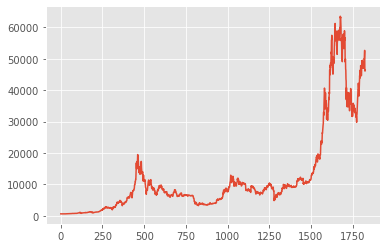

In [1202]:
plt.plot(bit)
plt.show()

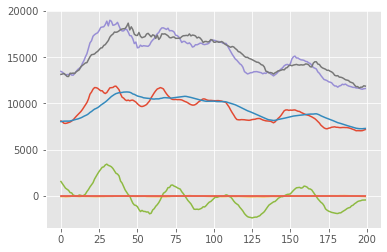

In [1203]:
MA_bit_short = Indicators.MA_short('bit', len(bit))
MA_bit_long = Indicators.MA_long('bit', len(bit))
EMA12_bit = Indicators.EMA_12('bit', len(bit))
EMA26_bit = Indicators.EMA_26('bit', len(bit))
DIF_bit = Indicators.DIF('gold', len(bit))
DEA_bit = Indicators.DEA('bit', len(bit))
RSI_bit = Indicators.RSI('bit', len(bit))
BIAS_bit = Indicators.BIAS('bit', len(bit))
plt.plot(MA_bit_short[1000:1200])
plt.plot(MA_bit_long[1000:1200])
plt.plot(EMA12_bit[1000:1200])
plt.plot(EMA26_bit[1000:1200])
plt.plot(DIF_bit[1000:1200])
plt.plot(DEA_bit[1000:1200])
plt.plot(RSI_bit[1000:1200])
plt.plot(BIAS_bit[1000:1200])
plt.show()

In [1204]:
bit_buy_MA = []
bit_sell_MA = []
for i in range(len(MA_bit_short)):
    if (MA_bit_short[i] > MA_bit_long[i]) & (MA_bit_short[i-1] < MA_bit_long[i-1]) & (MA_bit_short[i-1] != 0) & (MA_bit_long[i-1] != 0):
        bit_buy_MA.append(i)
    elif (MA_bit_short[i] < MA_bit_long[i]) & (MA_bit_short[i-1] > MA_bit_long[i-1]):
        bit_sell_MA.append(i)

bit_buy_DIFDEA = []
bit_sell_DIFDEA = []
for i in range(len(DIF_bit)):
    if (DIF_bit[i] > DEA_bit[i]) & (DIF_bit[i-1] < DEA_bit[i-1]) & (DIF_bit[i-1] != 0) & (DEA_bit[i-1] != 0):
        bit_buy_DIFDEA.append(i)
    elif (DIF_bit[i] < DEA_bit[i]) & (DIF_bit[i-1] > DEA_bit[i-1]) & (DIF_bit[i-1] != 0) & (DEA_bit[i-1] != 0):
        bit_sell_DIFDEA.append(i)

bit_buy_DIF = []
bit_sell_DIF = []
for i in range(len(DIF_bit)):
    if (DIF_bit[i] > 0) & (DIF_bit[i-1] < 0):
        bit_buy_DIF.append(i)
    elif (DIF_bit[i] < 0) & (DIF_bit[i-1] > 0):
        bit_sell_DIF.append(i)

bit_buy_RSI = []
bit_sell_RSI = []
for i in range(len(RSI_bit)):
    if (RSI_bit[i] < 0.3) & (RSI_bit[i-1] > 0.3):
        bit_buy_RSI.append(i)
    elif (RSI_bit[i] > 0.7) & (RSI_bit[i-1] < 0.7):
        bit_sell_RSI.append(i)


In [1205]:
print(len(bit_buy_MA), len(bit_sell_MA))
print(len(bit_buy_DIFDEA), len(bit_sell_DIFDEA))
print(len(bit_buy_DIF), len(bit_sell_DIF))
print(len(bit_buy_RSI), len(bit_sell_RSI))

33 33
20 21
30 31
149 181


In [1206]:
bit_buy_MA = numpy.array(bit_buy_MA)
bit_buy_DIF = numpy.array(bit_buy_DIF)
bit_buy_DIFDEA = numpy.array(bit_buy_DIFDEA)
bit_buy_RSI = numpy.array(bit_buy_RSI)

bit_sell_MA = numpy.array(bit_sell_MA)
bit_sell_DIF = numpy.array(bit_sell_DIF)
bit_sell_DIFDEA = numpy.array(bit_sell_DIFDEA)
bit_sell_RSI = numpy.array(bit_sell_RSI)

In [1207]:
bit_buy = numpy.concatenate((bit_buy_DIFDEA, bit_buy_DIF, bit_buy_RSI))
# bit_buy = numpy.array(bit_buy_RSI)
# bit_buy = numpy.concatenate((bit_buy_DIFDEA, bit_buy_DIF))
bit_sell = numpy.concatenate((bit_sell_DIFDEA, bit_sell_DIF, bit_sell_RSI))
# bit_sell = numpy.array(bit_sell_RSI)
# bit_sell = numpy.concatenate((bit_sell_DIFDEA, bit_sell_DIF))
print(bit_buy.shape)
print(bit_sell.shape)

bit_buy = numpy.unique(bit_buy)
bit_sell = numpy.unique(bit_sell)
print(bit_buy.shape)
print(bit_sell.shape)

(199,)
(233,)
(192,)
(224,)


In [1208]:
bit_buy_ = []
for i in bit_buy:
    condition = (bit_sell == i) | (
        bit_sell == i-1) | (bit_sell == i-2) | (bit_sell == i-3)
    if len(numpy.extract(condition, bit_sell)) == 0:
        bit_buy_.append(i)

print(len(bit_buy_))


149


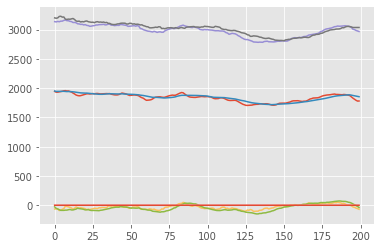

In [1209]:
MA_gold_short = Indicators.MA_short('gold', len(gold))
MA_gold_long = Indicators.MA_long('gold', len(gold))
EMA12_gold = Indicators.EMA_12('gold', len(gold))
EMA26_gold = Indicators.EMA_26('gold', len(gold))
DIF_gold = Indicators.DIF('gold', len(gold))
DEA_gold = Indicators.DEA('gold', len(gold))
RSI_gold = Indicators.RSI('gold', len(gold))
BIAS_gold = Indicators.BIAS('gold', len(gold))
plt.plot(MA_gold_short[1000:1200])
plt.plot(MA_gold_long[1000:1200])
plt.plot(EMA12_gold[1000:1200])
plt.plot(EMA26_gold[1000:1200])
plt.plot(DIF_gold[1000:1200])
plt.plot(DEA_gold[1000:1200])
plt.plot(RSI_gold[1000:1200])
plt.plot(BIAS_gold[1000:1200])
plt.show()

In [1210]:
gold_buy_MA = []
gold_sell_MA = []
for i in range(len(MA_gold_short)):
    if (MA_gold_short[i] > MA_gold_long[i]) & (MA_gold_short[i-1] < MA_gold_long[i-1]):
        gold_buy_MA.append(i)
    elif (MA_gold_short[i] < MA_gold_long[i]) & (MA_gold_short[i-1] > MA_gold_long[i-1]):
        gold_sell_MA.append(i)

gold_buy_DIFDEA = []
gold_sell_DIFDEA = []
for i in range(len(DIF_gold)):
    if (DIF_gold[i] > DEA_gold[i]) & (DIF_gold[i-1] < DEA_gold[i-1]) & (DIF_gold[i-1] != 0) & (DEA_gold[i-1] != 0):
        gold_buy_DIFDEA.append(i)
    elif (DIF_gold[i] < DEA_gold[i]) & (DIF_gold[i-1] > DEA_gold[i-1]) & (DIF_gold[i-1] != 0) & (DEA_gold[i-1] != 0):
        gold_sell_DIFDEA.append(i)

gold_buy_DIF = []
gold_sell_DIF = []
for i in range(len(DIF_gold)):
    if (DIF_gold[i] > 0) & (DIF_gold[i-1] < 0):
        gold_buy_DIF.append(i)
    elif (DIF_gold[i] < 0) & (DIF_gold[i-1] > 0):
        gold_sell_DIF.append(i)

gold_buy_RSI = []
gold_sell_RSI = []
for i in range(len(RSI_gold)):
    if (RSI_gold[i] < 0.3) & (RSI_gold[i-1] > 0.3):
        gold_buy_RSI.append(i)
    elif (RSI_gold[i] > 0.7) & (RSI_gold[i-1] < 0.7):
        gold_sell_RSI.append(i)

In [1211]:
print(len(gold_buy_MA), len(gold_sell_MA))
print(len(gold_buy_DIFDEA), len(gold_sell_DIFDEA))
print(len(gold_buy_DIF), len(gold_sell_DIF))
print(len(gold_buy_RSI), len(gold_sell_RSI))

38 38
43 43
30 31
13 18


In [1212]:
gold_buy_MA = numpy.array(gold_buy_MA)
gold_buy_DIF = numpy.array(gold_buy_DIF)
gold_buy_DIFDEA = numpy.array(gold_buy_DIFDEA)
gold_buy_RSI = numpy.array(gold_buy_RSI)

gold_sell_MA = numpy.array(gold_sell_MA)
gold_sell_DIF = numpy.array(gold_sell_DIF)
gold_sell_DIFDEA = numpy.array(gold_sell_DIFDEA)
gold_sell_RSI = numpy.array(gold_sell_RSI)

In [1213]:
gold_buy = numpy.concatenate((gold_buy_DIFDEA, gold_buy_DIF, gold_buy_RSI))
# gold_buy = numpy.array(gold_buy_RSI)
# gold_buy = numpy.concatenate((gold_buy_DIFDEA, gold_buy_DIF))
gold_sell = numpy.concatenate((gold_sell_DIFDEA, gold_sell_DIF, gold_sell_RSI))
# gold_sell = numpy.array(gold_sell_RSI)
# gold_sell = numpy.concatenate((gold_sell_DIFDEA, gold_sell_DIF))
print(gold_buy.shape)
print(gold_sell.shape)

gold_buy = numpy.unique(gold_buy)
gold_sell = numpy.unique(gold_sell)
print(gold_buy.shape)
print(gold_sell.shape)

(86,)
(92,)
(83,)
(90,)


In [1214]:
gold_buy_ = []
for i in gold_buy:
    condition = (gold_sell == i) | (
        gold_sell == i-1) | (gold_sell == i-2) | (gold_sell == i-3)
    if len(numpy.extract(condition, gold_sell)) == 0:
        gold_buy_.append(i)

print(len(gold_buy_))


45


In [1215]:
print(gold_buy_)

[33, 53, 57, 88, 107, 131, 170, 203, 226, 252, 271, 320, 333, 363, 415, 534, 555, 571, 582, 606, 614, 628, 686, 726, 764, 829, 860, 875, 892, 928, 940, 953, 1002, 1060, 1080, 1097, 1101, 1122, 1124, 1154, 1165, 1203, 1207, 1219, 1236]


In [1216]:
buy_day = numpy.concatenate((bit_buy_, gold_buy_))
buy_day = numpy.unique(buy_day)
print(buy_day.shape)

(184,)


In [1217]:
from scipy.optimize import minimize

In [1218]:
def solve1(array1, array2, w0_, w1_, w2_, M_, i, j, L=0.15):
    r1 = (array1[i] - array1[i-27])/(array1[i-27])
    r2 = (array2[j] - array2[j-27])/(array2[j-27])
    s1 = numpy.std(array1[i-27:i+1])
    s2 = numpy.std(array2[j-27:j+1])
    q1 = (2 * s1)/array1[i]
    q2 = (2 * s2)/array2[j]
    P1 = array1[i]/array1[i-1]
    P2 = array2[j]/array2[j-1]
    c1, c2 = 0.02, 0.01

    V = lambda X: -((r1*X[0]*X[2]+r2*X[1]*X[2])-(c1*(((X[0]*X[2]-w1_*M_*P1)**(2))**(0.5))) - (c2*(((X[1]*X[2]-w2_*M_*P2)**(2))**(0.5))))
        
    cons1 = dict(type='ineq', fun=lambda X: X[0])
    cons2 = dict(type='ineq', fun=lambda X: X[1])
    cons3 = dict(type='ineq', fun=lambda X: 1-X[0]-X[1])
    cons4 = dict(type='ineq', fun=lambda X: L-q1*X[0]-q2*X[1])
    cons5 = dict(type='eq', fun=lambda X: X[2]+(c1*(((X[0]*X[2]-w1_*M_*P1)**(2))**(0.5))) + (c2*(((X[1]*X[2]-w2_*M_*P2)**(2))**(0.5))) - (w0_*M_ + w1_ * M_*P1 + w2_*M_*P2))
    cons = [cons1, cons2, cons3, cons4, cons5]
    result = minimize(
        V, numpy.array((0.5,0.5,1000)), constraints=cons)
    return result



def solve2(array1, array2, w0_, w1_, w2_, M_, i, j, L=0.15):
    r1 = (array1[i] - array1[i-27])/(array1[i-27])
    r2 = (array2[j-1] - array2[j-28])/(array2[j-28])
    s1 = numpy.std(array1[i-27:i+1])
    s2 = numpy.std(array2[j-28:j])
    q1 = (2 * s1)/array1[i]
    q2 = (2 * s2)/array2[j-1]
    P1 = array1[i]/array1[i-1]
    P2 = 1
    c1, c2 = 0.02, 0.01

    V = lambda X: -((r1*X[0]*X[2]+r2*X[1]*X[2])-(c1*(((X[0]*X[2]-w1_*M_*P1)**(2))**(0.5))))
        
    cons1 = dict(type='ineq', fun=lambda X: X[0])
    cons2 = dict(type='ineq', fun=lambda X: X[1])
    cons3 = dict(type='ineq', fun=lambda X: 1-X[0]-X[1])
    cons4 = dict(type='ineq', fun=lambda X: L-q1*X[0]-q2*X[1])
    cons5 = dict(type='eq', fun=lambda X: X[2]+(c1*(((X[0]*X[2]-w1_*M_*P1)**(2))**(0.5))) - (w0_*M_ + w1_ * M_*P1 + w2_*M_*P2))
    cons = [cons1, cons2, cons3, cons4, cons5]
    result = minimize(
        V, numpy.array((0.5,0.5,1000)), constraints=cons)
    return result

In [1219]:
r=solve1(bit, gold, 1, 0, 0, 1000, 29, 29)

In [1220]:
print(r['x'])

[ 7.46902540e-12 -1.45943257e-11  1.00000000e+03]


In [1221]:
def contains(i, array):
    return i in array

In [1222]:
def Cal(bit, gold, bit_date, gold_date, bit_buy_, gold_buy_):
    j = 0
    M = []
    w1, w2 = [], []
    B, G, C = 0, 0, 1000
    for i in range(len(bit)):
        if bit_date[i] != gold_date[j]:
            if contains(i, bit_buy_):
                result = solve2(
                    bit, gold, C/M[-1], B*bit[i]/M[-1], G*gold[j]/M[-1], M[-1], i, j)
                M_ = round(result['x'][2], 4)
                M.append(M_)
                w1.append(result['x'][0])
                w2.append(result['x'][1])
                B = round(result['x'][0]*M_/bit[i], 4)
                G = round(result['x'][1]*M_/gold[j], 4)
                C = round(M_ - result['x'][0]*M_ - result['x'][1]*M_, 4)
            else:
                M.append(B*bit[i]+G*gold[j]+C)
                w1.append(B*bit[i]/M[-1])
                w2.append(G*gold[j]/M[-1])
        else:
            if contains(i, bit_buy_) | contains(j, gold_buy_):
                result = solve1(
                    bit, gold, C/M[-1], B*bit[i]/M[-1], G*gold[j]/M[-1], M[-1], i, j)
                M_ = round(result['x'][2], 4)
                M.append(M_)
                w1.append(result['x'][0])
                w2.append(result['x'][1])
                B = round(result['x'][0]*M_/bit[i], 4)
                G = round(result['x'][1]*M_/gold[j], 4)
                C = round(M_ - result['x'][0]*M_ - result['x'][1]*M_, 4)
            else:
                M.append(B*bit[i]+G*gold[j]+C)
                w1.append(B*bit[i]/M[-1])
                w2.append(G*gold[j]/M[-1])
            j += 1
    return M, w1, w2


In [1223]:
gold_date = numpy.array(gold_date)
bit_day = numpy.array(bit_date)


In [1224]:
M, w1, w2 = Cal(bit, gold, bit_date, gold_date, bit_buy_, gold_buy_)

In [1225]:
plt.rcParams['text.usetex'] = False  # 开启Latex风格
plt.figure(figsize=(10, 10), dpi=70)  # 设置图像大小
plt.style.use('ggplot')  # 加载'ggplot'风格

<Figure size 700x700 with 0 Axes>

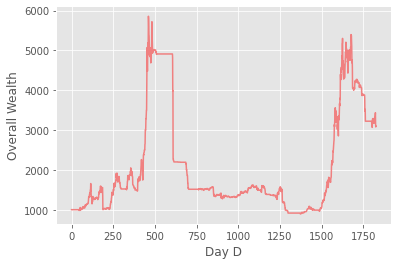

In [1226]:
plt.plot(M, color = 'lightcoral')
plt.xlabel('Day D')
plt.ylabel('Overall Wealth')
plt.show()

In [1227]:
print(M[-1])

3097.428492


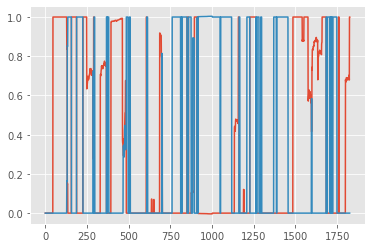

In [1228]:
plt.plot(w1)
plt.plot(w2)
plt.show()

[0, 0] 14810.159586000002 
[0.005, 0.005] 12357.255885
[0.01, 0.01] 11425.245216000001
[0.015, 0.01] 9811.614804
[0.02, 0.01] 11619.993714
[0.02, 0.02] 7154.688867
[0.025, 0.015] 9296.922345
[0.03, 0.02] 4168.545231
[0.025, 0.01] 10052.731992
[0.03, 0.01] 5012.455389000001
[0.03, 0.03] 5833.181202

In [1229]:
print(max(bit)/min(bit))

106.97959870724482
